<a href="https://colab.research.google.com/github/Taenja/CDE_MachineLearning/blob/main/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB SESSION 1 - DECISION TREES

# Utils

In [4]:
#conda install -c conda-forge scikit-learn, pandas 

In [5]:
#conda install seaborn

## Ex 1: introduction to classification trees

We work with the palmerpenguins dataset (see the dataset document https://allisonhorst.github.io/palmerpenguins/).
Before to start, we: 
 - load the data and look at them (display the dimension and some descriptive statistics) 
 - select the variables that we will use in the exercise, 
 - visualize the data.
 - split the dataset into a training and testing dataset (use the value 0 for the random seed) 

In [6]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
penguins = pd.read_csv("/content/drive/MyDrive/ubs/machine learning/penguins.csv") 
penguins.head()
penguins.shape
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
# (2) Select the variables that we will use in the exercise
penguins_classif=penguins[["species","bill_length_mm","bill_depth_mm"]]
penguins_classif.head(10)

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6
5,Adelie,38.9,17.8
6,Adelie,39.2,19.6
7,Adelie,41.1,17.6
8,Adelie,38.6,21.2
9,Adelie,34.6,21.1


In [8]:
#Convert the variable species as categorical variables
penguins_classif.dtypes
penguins_classif["species"]= pd.Categorical(penguins_classif["species"])
penguins_classif.dtypes
penguins_classif.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6
5,Adelie,38.9,17.8
6,Adelie,39.2,19.6
7,Adelie,41.1,17.6
8,Adelie,38.6,21.2
9,Adelie,34.6,21.1


In [9]:
target_column = "species" # The response variable that we will consider
features_columns = ["bill_length_mm", "bill_depth_mm"] # The predictors/features used to predict the target

In [10]:
from sklearn.preprocessing import OrdinalEncoder
#species_code = pd.to_numeric(penguins_classif[["species"]])
penguins_classif["species"]
ord_enc = OrdinalEncoder()
penguins_classif["species_code"] = ord_enc.fit_transform(penguins_classif[["species"]])
penguins_classif[["species", "species_code"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,species,species_code
0,Adelie,0.0
1,Adelie,0.0
2,Adelie,0.0
3,Adelie,0.0
4,Adelie,0.0
...,...,...
328,Chinstrap,1.0
329,Chinstrap,1.0
330,Chinstrap,1.0
331,Chinstrap,1.0


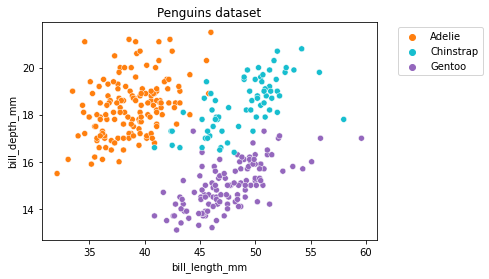

In [11]:
# (3) Visualize the dataset
import seaborn as sns
import matplotlib.pyplot as plt
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],
                     hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Penguins dataset")

In [12]:
# (4) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
data, target = penguins_classif[features_columns], penguins_classif[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0, test_size=0.25)

In [13]:
print(data_test.shape);
print(data_train.shape)

(84, 2)
(249, 2)


**Question 1. Fit a classification tree to explain species by the length and the width of the bill and draw it. Your tree will fit the train set and will have a maximum depth of 2 (use also random_state=0).**

*random_state: parameter that controls the randomness of the estimator, used if the improvement of the criterion is identical for several splits then one split has to be selected at random).*

|--- feature_1 <= 16.35
|   |--- feature_0 <= 39.30
|   |   |--- class: Adelie
|   |--- feature_0 >  39.30
|   |   |--- class: Gentoo
|--- feature_1 >  16.35
|   |--- feature_0 <= 44.25
|   |   |--- class: Adelie
|   |--- feature_0 >  44.25
|   |   |--- class: Chinstrap



[Text(279.0, 679.5, 'bill_depth_mm <= 16.35\ngini = 0.644\nsamples = 249\nvalue = [104, 53, 92]\nclass = Adelie'),
 Text(139.5, 407.69999999999993, 'bill_length_mm <= 39.3\ngini = 0.065\nsamples = 89\nvalue = [3, 0, 86]\nclass = Gentoo'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = Adelie'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 86\nvalue = [0, 0, 86]\nclass = Gentoo'),
 Text(418.5, 407.69999999999993, 'bill_length_mm <= 44.25\ngini = 0.49\nsamples = 160\nvalue = [101, 53, 6]\nclass = Adelie'),
 Text(348.75, 135.89999999999998, 'gini = 0.092\nsamples = 103\nvalue = [98, 5, 0]\nclass = Adelie'),
 Text(488.25, 135.89999999999998, 'gini = 0.277\nsamples = 57\nvalue = [3, 48, 6]\nclass = Chinstrap')]

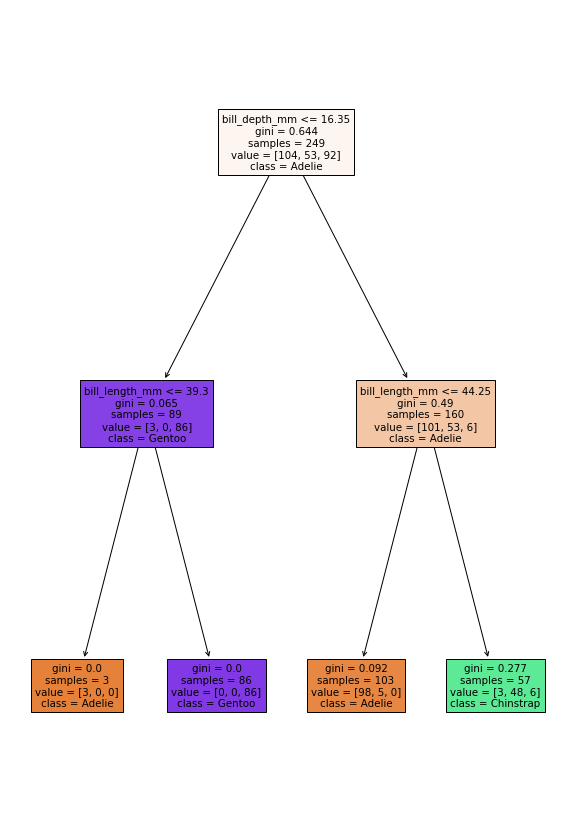

In [14]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: 
## - see the documentation of the module Tree of scikit-learn : https://scikit-learn.org/stable/modules/tree.html

## - import DecisionTreeClassifier and plot_tree from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree # module importation
# Use the name tree_clf for your tree classifier. 

#we use random_state as 0 coz we have plenty of state to choose best at random 
# Step 1: create the object tree_clf, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=2,random_state=0)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
tree_clf.fit(data_train, target_train)

# Step 3: plot the tree (text representation)
from sklearn import tree # importation of the module tree  
text_representation =tree.export_text(tree_clf)
print(text_representation)


# Step 4: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,15))
tree.plot_tree(decision_tree=tree_clf, feature_names=features_columns, class_names=tree_clf.classes_, filled=True)

**Question 2. Based on the plot of the tree, write the prediction $f_n(\mathbf x)$ associated to the tree for a new observation $\mathbf x \in \mathbb R^2$.**

In [15]:
##----- You can write your answer here or on a paper as well-----##

 Based on $$f_n(x)= \sum_{t \in P} \hat c \mathbb {1}_{x \in t}$$
 
 We can say that the prediction for a new observation will be:

$f_n(\mathbf x) = 0 \times \mathbf 1_{\lbrace x_1 \leq 16.35 ,  x_2 \leq 39.3\rbrace} + 0 \times \mathbf 1_{\lbrace x_1 > 16.35, x_2 \leq 44.25 \rbrace} + 2\times \mathbf 1_{\lbrace x_1 \leq 16.35, x_2 > 39.3 \rbrace} + 1\times \mathbf 1_{\lbrace x_1 > 16.35 , x_2 > 44.25 \rbrace}$


**Question 3. Consider a penguins with a bill measuring 45mm (length) and 18mm (depth). What is the probability that this penguins belongs to the Adelie familly, $\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)$ ?**

In [16]:
##----- You can write your answer here or on a paper as well-----##

#it falls inti the forth leaf(the leaf on the right)


$\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18) = \frac{3}{57}$

**Question 4. Plot the data and the partition associated to the tree. (Complete the command below by filling in the gaps '...'.)**

In [17]:
##------- Complete the command below by filling in the gaps '...'.-------##


range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}


import numpy as np

# A function to plot the partition associated to a decision tree model
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax


Text(0.5, 1.0, 'Penguins dataset')

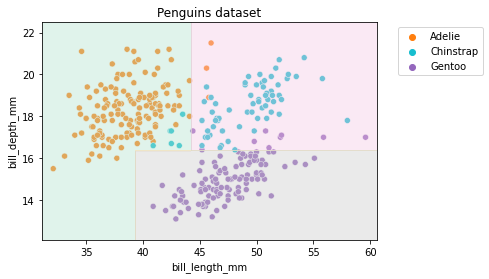

In [18]:
# Define the colors used
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],hue=target_column, palette=palette)# Define the grid : the data space 
plot_decision_function(tree_clf, range_features,ax=ax) # display the tree partition
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # graphical options
plt.title("Penguins dataset")# graphical options

In [19]:
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}


import numpy as np


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax

**Question 4. Have a look at the tree structure (read the scikit-learn documentation and specially the section *Understanding the decision tree structure*). Print the following tree parameters: the split variables, the thresholds, the id of each node, the number of observations in each nodes and the impurity value in each node.**

In [20]:
##------- Complete the command below -------##
## Help: 
## https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=sklearn%20tree%20_tree%20tree
# Look at the object: tree_clf.tree_

tree_clf.tree_.feature # give the ordered list of the split variables. 
#Do the same for the thresholds, the id of each node, the number of observations in each nodes and the impurity value in each node


array([ 1,  0, -2, -2,  0, -2, -2])

In [21]:
## Solution
print(tree_clf.tree_.node_count);  #it will give the number of split variables
print(tree_clf.tree_.children_left) #id of the left child nodes
print(tree_clf.tree_.children_right) #  id of the right child nodes 
print(tree_clf.tree_.impurity)# the impurity in each node is printed
print(tree_clf.tree_.threshold)# the threshold in each node

7
[ 1  2 -1 -1  5 -1 -1]
[ 4  3 -1 -1  6 -1 -1]
[0.64373155 0.06514329 0.         0.         0.49039062 0.0923744
 0.27700831]
[16.34999943 39.30000114 -2.         -2.         44.25       -2.
 -2.        ]


**Question 4. Predict the class of each observation of the test sample by using the tree and display the confusion matrix. Explain it. How many observations are misclassified?**

In [22]:
print(tree_clf.predict(data_test))

['Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap']


['Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap']
0.9523809523809523


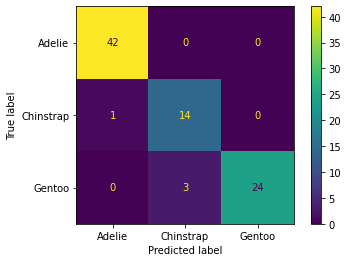

In [23]:
##------- Complete the command below by filling in the gaps '...'.-------##

predictions_test = tree_clf.predict(X=data_test) # Calculate the predictions for the test set
print(predictions_test) # Print these predictions

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # import the module to display confusion matrix

cm = confusion_matrix(y_true=target_test, y_pred=predictions_test) # define the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_) # display the confusion matrix
disp.plot() 

accuracy = tree_clf.score(X=data_test,y=target_test);print(accuracy) # calculate the accuracy

**Question 5. Fit a tree with a maximum depth of 5 (random_state=0). Draw the tree and compute the accuracy of this second tree on the test set. Compare the accuracy between the two trees.**

0.9761904761904762


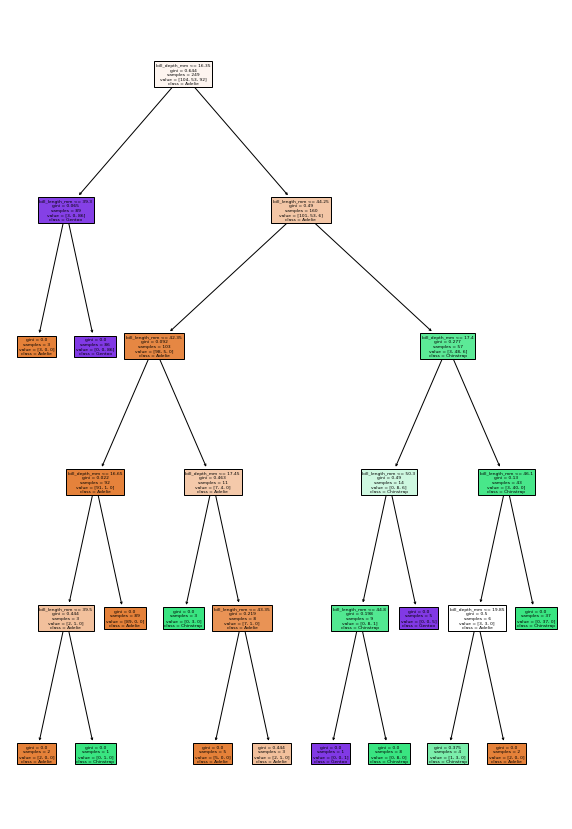

In [24]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: create the object tree_clf_d5, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=5
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf_d5 = DecisionTreeClassifier(random_state=0,max_depth=5)

# Step 2: build the tree on the train set by indicating the input data and the target variable 
tree_clf_d5.fit(X=data_train,y=target_train)

# Step 3: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,15))
tree_plot_d5 = tree.plot_tree(decision_tree=tree_clf_d5,feature_names=features_columns,class_names=tree_clf.classes_,filled=True)

# Step 4: compute the accuracy of the tree using the test set
predictions_test_d5 = tree_clf_d5.predict(X=data_test)
accuracy_d5 = tree_clf_d5.score(X=data_test,y=target_test);print(accuracy_d5)

In [25]:
# compare the accuracy of tree with depth of 5 and tree with max depth of 2
accuracy == accuracy_d5

False

**Question 6: TREE PRUNING - As we don't know what what is the best size of the tree, we will apply the cost-complexity pruning method.**
   - **a) Fit the maximum tree (don't choose any value for max_depth and use random_state=0)**
   - **b) Get the sequence of values for the cost complexity parameter (ccp_alpha)**
   - **c) Train a decision tree for each value in the sequence and store the number of nodes and the depth of each tree.**
   - **d) Compute the accuracy on both the train set and test set for each tree.**
   - **e) Draw the following plots :**
      **Plot 1 = node_count vs ccp_alpha,**
      **Plot 2 = depth vs ccp_alpha**
      **Plot 3 = accuracy vs ccp_alpha for training and testing sets.**

In [26]:
## (a) Fit the maximum tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_tree_clf = DecisionTreeClassifier(random_state=0)# max_depth=....)

In [27]:
## (b) Get the sequence of values for the cost complexity parameter (ccp_alpha)
path = max_tree_clf.cost_complexity_pruning_path(X=data_train, y=target_train)
ccp_alphas= path.ccp_alphas; print(ccp_alphas)

[0.         0.00301205 0.00351406 0.00397241 0.0060241  0.00713967
 0.01036705 0.01161908 0.01692831 0.02328415 0.2134878  0.30533696]


In [28]:
## c) Train a decision tree for each value in the sequence 
##    and store node_count and max_depth
tree_clfs = []
for alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    tree_clf.fit(data_train, target_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs];print(node_counts)#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs];print(depth)#a vector with the depth for all decision trees 

[33, 29, 25, 21, 19, 17, 15, 11, 7, 5, 3]
[7, 6, 5, 5, 5, 4, 4, 4, 2, 2, 1]


In [29]:
## (d) Compute the accuracy on both the train set and test set for each tree.
train_acc = [tree_clf.score(X=data_train, y=target_train) for tree_clf in tree_clfs]
print(train_acc)
test_acc = [tree_clf.score(X=data_test, y=target_test) for tree_clf in tree_clfs]
print(test_acc)

[1.0, 0.9959839357429718, 0.9919678714859438, 0.9879518072289156, 0.9799196787148594, 0.9759036144578314, 0.9759036144578314, 0.963855421686747, 0.9437751004016064, 0.9317269076305221, 0.751004016064257]
[0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9523809523809523, 0.9523809523809523, 0.9761904761904762, 0.9642857142857143, 0.9523809523809523, 0.9166666666666666, 0.75]


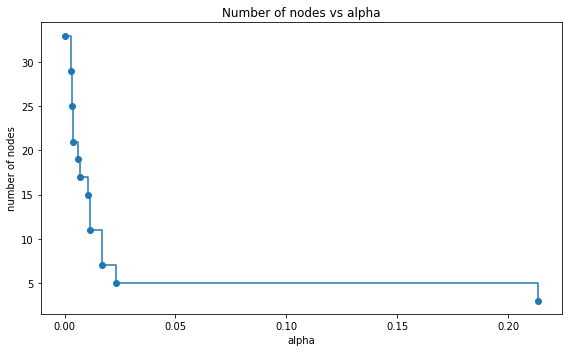

In [30]:
## (e) Plot 1

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")
fig.tight_layout()

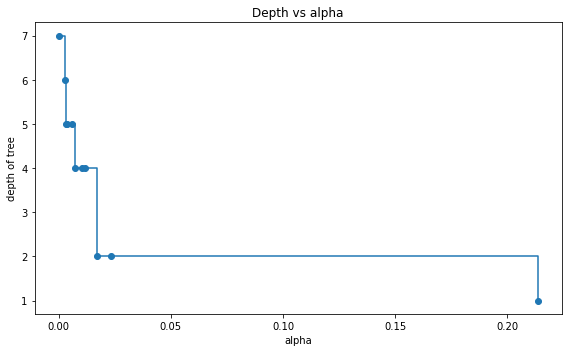

In [31]:
## (e) Plot 2

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")
fig.tight_layout()

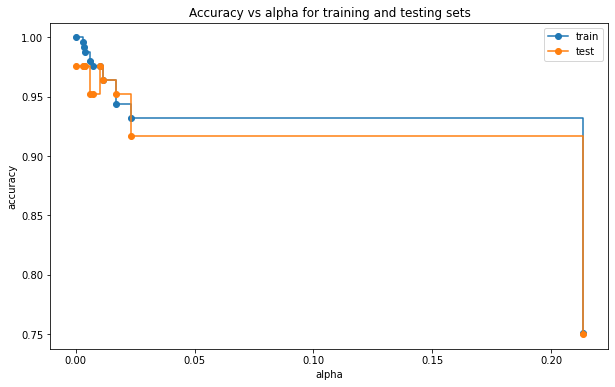

In [32]:
## (e) Plot 3
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ccp_alphas, train_acc, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc, marker='o', label="test",
        drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.legend()
plt.show()

**Question ... Based on Plot 3, what final tree do you select ? Justify your choice. What is the ccp_alpha value for this tree ?**  
**Next, plot the final tree. After, on another plot, plot the data and superimpose the partition associated to the final tree.** 

0.0030120481927710845
0.0030120481927710845


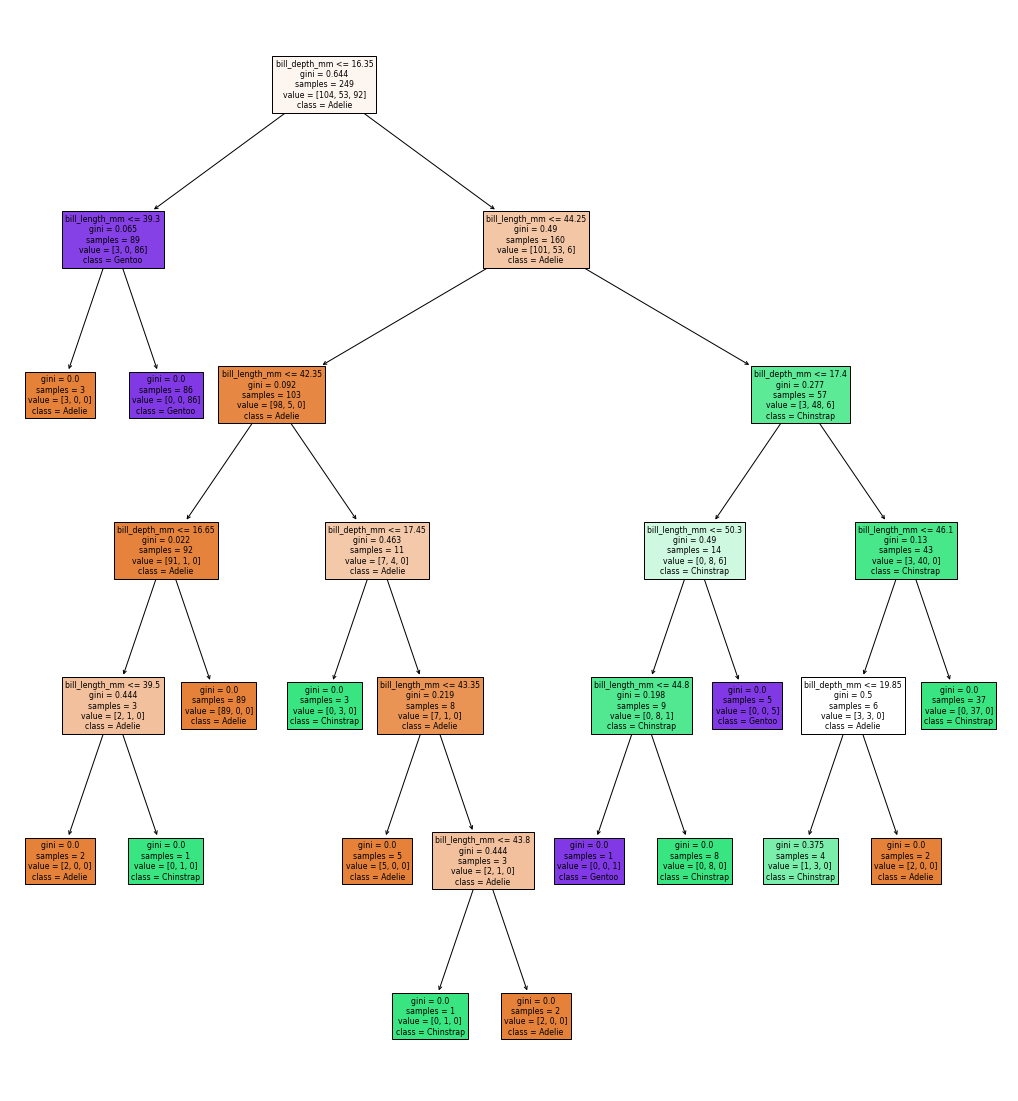

In [33]:
##------- Complete the command below by filling in the gaps '...'.-------##

index= ccp_alphas[1] # find the index for the alpha values that maximize the accuracy on the test set
#index=np.wheretest_acc==max(test_acc)
print(index)
best_alpha=ccp_alphas[1]; print(best_alpha)# choose the 'best alpha' (There are several values for alpha that maximize the accuracy and the test set. 
#So the best value for alpha is the one that is associated to the smallest tree and associate to the simplest tree)

final_tree_clf = tree_clfs[1] #find the final tree into the sequence tree_clfs of optimal trees 
fig = plt.figure(figsize=(18,20))
final_tree_plot= tree.plot_tree(final_tree_clf,feature_names=features_columns,class_names=final_tree_clf.classes_,filled=True)# display the final tree

In [34]:
#ccp_alpha values in the creation of this table were:
ccp_alphas

array([0.        , 0.00301205, 0.00351406, 0.00397241, 0.0060241 ,
       0.00713967, 0.01036705, 0.01161908, 0.01692831, 0.02328415,
       0.2134878 ])

From the above model though several values for ccp_alpha was iterated 0.0030120481927710845 and 0.0030120481927710845 was computed as the best values.

## Ex 2: introduction to regression trees

We work with the iris dataset (see the dataset documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).
Before to start, we: 
 - load the data and look at them (dimension, attributes, statistic summary), 
 - select the variables that we will use in the exercise (predictor/feature = sepal length, target = petal length), 
 - plot the data (x-axis = sepal length, y-axis = petal length).
 - split the dataset into a training and testing dataset (use random.state=0 and test_size=0.3)

**Load the data and look at them (dimension, attributes, statistic summary)**

In [35]:
# (1) Load the data and look at them (dimension, attributes, statistic summary)
import pandas as pd # data analysis
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Selecting the variables that we will used in the exercise**

In [36]:
# (2) Select the variables that we will use in the exercise

X = pd.DataFrame(iris.data[:,2],columns=['Petal length'])# Petal length
Y = pd.DataFrame(iris.data[:,3], columns=['Petal width']) # Petal width
data = pd.concat([X,Y], axis=1)
X_column=['Petal length']
data.head(10)

,Petal length,Petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


**Ploting the data**

Text(0.5, 1.0, 'Iris dataset')

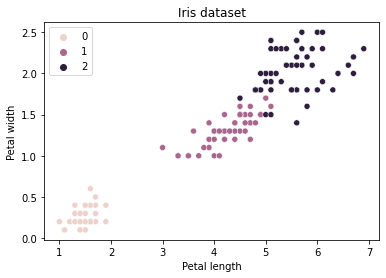

In [37]:
# (3) Plot the data

import seaborn as sns
ax2 = sns.scatterplot(data=data,x="Petal length", y="Petal width", hue=iris.target)
plt.title('Iris dataset') 

**Spliting the dataset into train and test dataset**

In [38]:
# (4) Split the dataset into train and test dataset (size of the test set = 30% of the data, random_state=0)

##------- Complete the command below by filling in the gaps '...'.-------##
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, test_size=0.30)

**Question 1. Fit a regression tree and a linear model to explain the petal width by the petal length. Plot the tree. Your tree will be fit on the train set and will have a maximum depth of 3.**

[Text(511.5, 713.475, 'sepal length (cm) <= 2.35\nmse = 0.603\nsamples = 105\nvalue = 1.228'),
 Text(279.0, 509.625, 'sepal length (cm) <= 1.65\nmse = 0.009\nsamples = 34\nvalue = 0.232'),
 Text(186.0, 305.775, 'sepal length (cm) <= 1.15\nmse = 0.006\nsamples = 31\nvalue = 0.219'),
 Text(93.0, 101.92499999999995, 'mse = 0.0\nsamples = 1\nvalue = 0.1'),
 Text(279.0, 101.92499999999995, 'mse = 0.006\nsamples = 30\nvalue = 0.223'),
 Text(372.0, 305.775, 'mse = 0.016\nsamples = 3\nvalue = 0.367'),
 Text(744.0, 509.625, 'sepal length (cm) <= 4.75\nmse = 0.186\nsamples = 71\nvalue = 1.704'),
 Text(558.0, 305.775, 'sepal length (cm) <= 4.35\nmse = 0.034\nsamples = 29\nvalue = 1.276'),
 Text(465.0, 101.92499999999995, 'mse = 0.016\nsamples = 18\nvalue = 1.172'),
 Text(651.0, 101.92499999999995, 'mse = 0.017\nsamples = 11\nvalue = 1.445'),
 Text(930.0, 305.775, 'sepal length (cm) <= 5.15\nmse = 0.076\nsamples = 42\nvalue = 2.0'),
 Text(837.0, 101.92499999999995, 'mse = 0.032\nsamples = 14\nvalu

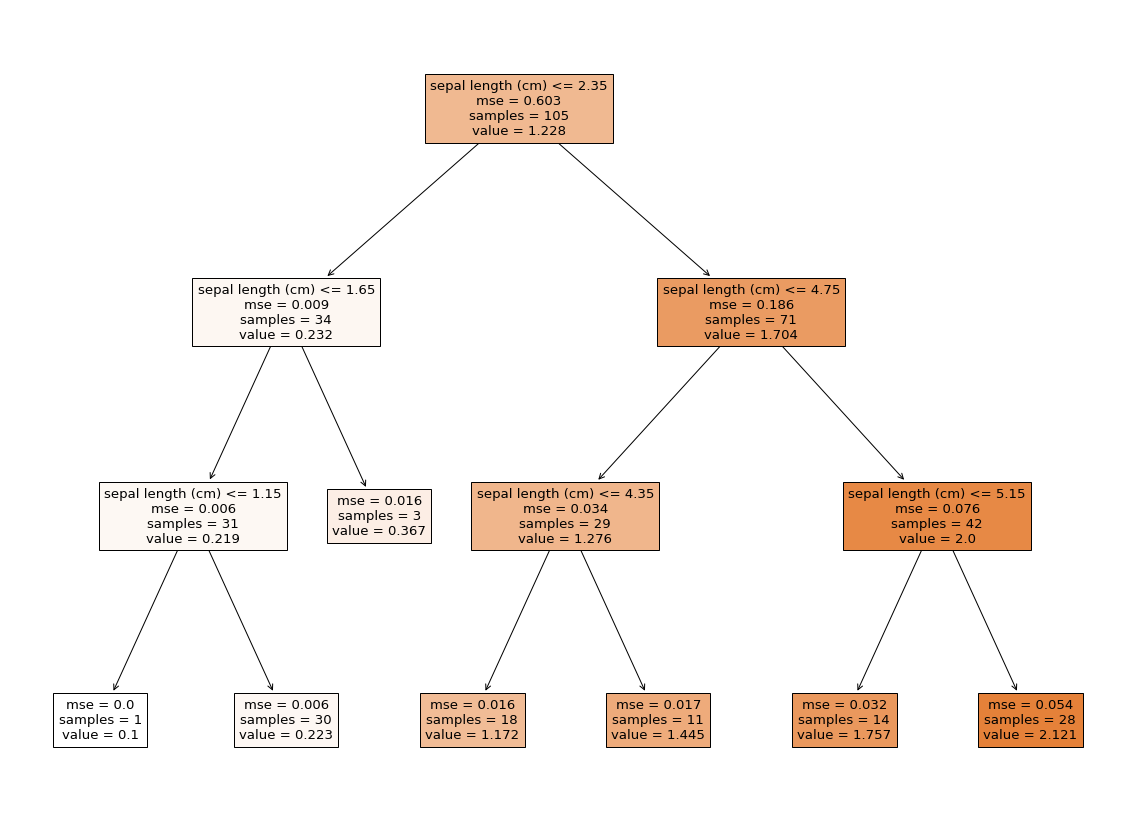

In [39]:
##------- Complete the command below by filling in the gaps '...'.-------##

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

linear_regression = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=3)

lr= linear_regression.fit(X_train, Y_train)
tr=tree_reg.fit(X_train, Y_train)

# Step 4: plot the tree (plot the figure)
plt.figure(figsize=(20,15))
plot_tree(tr,feature_names=iris.feature_names, class_names=iris.target_names ,filled=True)



**Question 2. Based on the plot of the tree, write the prediction function $f$ associated to the regression tree.**

In [46]:
##----- You can write your answer here or on a paper as well-----##
text_representation =tree.export_text(tr)
print("function f can be written as function of length where:\n ",text_representation)

function f can be written as function of length where:
  |--- feature_0 <= 2.35
|   |--- feature_0 <= 1.65
|   |   |--- feature_0 <= 1.15
|   |   |   |--- value: [0.10]
|   |   |--- feature_0 >  1.15
|   |   |   |--- value: [0.22]
|   |--- feature_0 >  1.65
|   |   |--- value: [0.37]
|--- feature_0 >  2.35
|   |--- feature_0 <= 4.75
|   |   |--- feature_0 <= 4.35
|   |   |   |--- value: [1.17]
|   |   |--- feature_0 >  4.35
|   |   |   |--- value: [1.45]
|   |--- feature_0 >  4.75
|   |   |--- feature_0 <= 5.15
|   |   |   |--- value: [1.76]
|   |   |--- feature_0 >  5.15
|   |   |   |--- value: [2.12]



**Question 3. Compute the predictions of both models on the test set.** 

In [41]:
##---- Write your answer ----##
# Step 4: compute the accuracy of the tree using the test set
# Evaluating Model's Performance
import sklearn

#linear regression model
predictions_lr = lr.predict(X_test)
print('Mean Absolute Errorof LR:', sklearn.metrics.mean_absolute_error(Y_test, predictions_lr))
print('Mean Squared Error of LR:', sklearn.metrics.mean_squared_error(Y_test, predictions_lr))
print('Mean Root Squared Error of LR:', np.sqrt(sklearn.metrics.mean_squared_error(Y_test, predictions_lr)))

#decision tree model
predictions_tr = tr.predict(X_test)
print('Mean Absolute Errorof TR:', sklearn.metrics.mean_absolute_error(Y_test, predictions_tr))
print('Mean Squared Error of TR:', sklearn.metrics.mean_squared_error(Y_test, predictions_tr))
print('Mean Root Squared Error of TR:', np.sqrt(sklearn.metrics.mean_squared_error(Y_test, predictions_tr)))

Mean Absolute Errorof LR: 0.1677835275546856
Mean Squared Error of LR: 0.05335352448031869
Mean Root Squared Error of LR: 0.23098381865472456
Mean Absolute Errorof TR: 0.16514959114959116
Mean Squared Error of TR: 0.054894350005008974
Mean Root Squared Error of TR: 0.23429543317147472


**Question 4. Display the data using a scatter plot and superimpose as two lines the predictions of both the models.** 

In [42]:
##---- Write your answer ----##


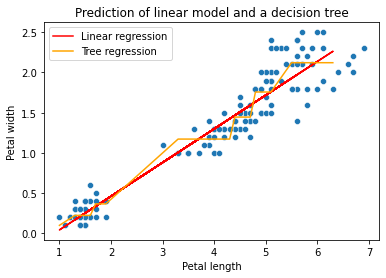

In [43]:
##------- Complete the command below by filling in the gaps '...'.-------##

X_test_sorted = X_test.sort_values(by='Petal length')
y_pred_sorted = np.sort(predictions_tr)
ax2=sns.scatterplot(data=data,x="Petal length", y="Petal width")
plt.plot(X_test, predictions_lr, color='red',label="Linear regression")
plt.plot(X_test_sorted, y_pred_sorted,color='orange',label="Tree regression")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")


**Question 5. Compute the accuracy for both the models. Interpret the results.**

In [44]:
##---- Write your answer ----##
accuracy_tr = sklearn.metrics.r2_score(Y_test,predictions_tr)
print("Overall Accuracy of TR: ",accuracy_tr)

accuracy_lr =sklearn.metrics.r2_score(Y_test,predictions_lr)
print("Overall Accuracy of LR: ",accuracy_lr)

Overall Accuracy of TR:  0.8925980108597651
Overall Accuracy of LR:  0.8956126694950287


It was observed that the overall accuracy for both the model was similar though they used different approaches to predict the outcome. Finally we can say that, in linear regression model, it tried fits a line that best describes the given problem, while the decision tree divides the space into rectangles, belonging to a certain target value.



```
Thank You
```

